# 4 - Gradient Boosting: Car Price Prediction

## Project Description
The client company which distributes automobiles, is developing an application for lead generation at the moment. The objective of the data science project is to build a machine learning model for defining a car price in order to put a correct price to the app. The client company pays close attention to the model prediction, execution time (run time) and speed of ML model learning.

## Project Methodology
To enhance data and predictions exploration, go beyond gradient boosting. Try simpler models - sometimes they work even better. These are rare cases that are easy to miss if you always apply only boosting.

Experiment and compare the characteristics of the models: the speed of work, the accuracy of the result. 

## Steps to execute:
Download and prepare data.
Train different models. For each, try different hyperparameters.
Analyze the speed of work and the quality of the models.


## Variables description
Target is a car price (in euro)
Features in the data
- DateCrawled — date of downloading the profile from the database
- VehicleType — vehicle body type
- RegistrationYear — year of vehicle registration
- Gearbox — type of gearbox
- Power — power (hp)
- Model — car model
- Kilometer — mileage (km)
- RegistrationMonth — month of vehicle registration
- FuelType — type of fuel
- Brand — car brand
- NotRepaired — Was the car under repair? Yes / No
- DateCreated — date of creation of the questionnaire
- NumberOfPictures — the number of photos of the car
- PostalCode — postal code of the owner of the questionnaire (user)
- LastSeen — date of last user activity
 
## Data
https://drive.google.com/drive/folders/1c7nagsCq3cUMLun8wiwyxgu99glHtGP3?usp=share_link
********************************************************************************


In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install jupyterthemes
# !pip install --upgrade warnings : warnings are inbuild we no need to install

# Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Car_Price_prediction\dataset\autos.csv")

In [4]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Drop Unwanted Column 

In [5]:
data =data.drop(['DateCrawled','DateCreated','LastSeen'], axis = 1)

In [6]:
data.columns

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'Repaired',
       'NumberOfPictures', 'PostalCode'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              354369 non-null  int64 
 1   VehicleType        316879 non-null  object
 2   RegistrationYear   354369 non-null  int64 
 3   Gearbox            334536 non-null  object
 4   Power              354369 non-null  int64 
 5   Model              334664 non-null  object
 6   Kilometer          354369 non-null  int64 
 7   RegistrationMonth  354369 non-null  int64 
 8   FuelType           321474 non-null  object
 9   Brand              354369 non-null  object
 10  Repaired           283215 non-null  object
 11  NumberOfPictures   354369 non-null  int64 
 12  PostalCode         354369 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 35.1+ MB


### Here Our Target Variable is Price which is in better format.

In [8]:
data.tail()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,NumberOfPictures,PostalCode
354364,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,0,2694
354365,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,0,39576
354366,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,0,26135
354367,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,0,87439
354368,3400,wagon,2002,manual,100,golf,150000,6,gasoline,volkswagen,NaN,0,40764


In [9]:
data.shape

(354369, 13)

# Check For Missing Value's

In [10]:
data.isnull().sum()

Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
NumberOfPictures         0
PostalCode               0
dtype: int64

### Here we can seen that Vehicle type, Gearbox, Model, FuelType has null value but if we remove these column from our analysis part then it will be very difficult to analysis car price because these are very important column. therefore, we will romove row which contain's null value.

In [11]:
# Remove Null Value.
data = data.dropna()

In [12]:
data.isnull().sum()

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
NumberOfPictures     0
PostalCode           0
dtype: int64

In [13]:
data.shape

(245814, 13)

# Car Price Prediction Data Visualization

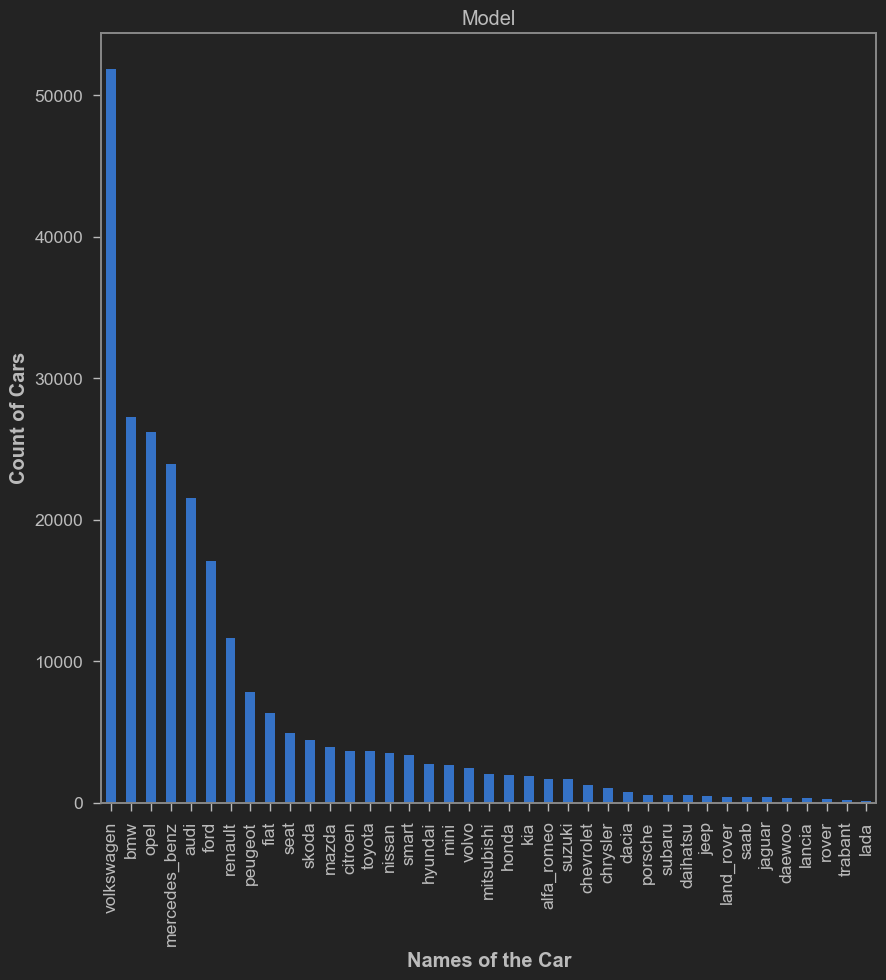

In [14]:
plt.figure(figsize=(10, 10))
ax=data['Brand'].value_counts().plot(kind='bar')
plt.title(label='Model')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.show()

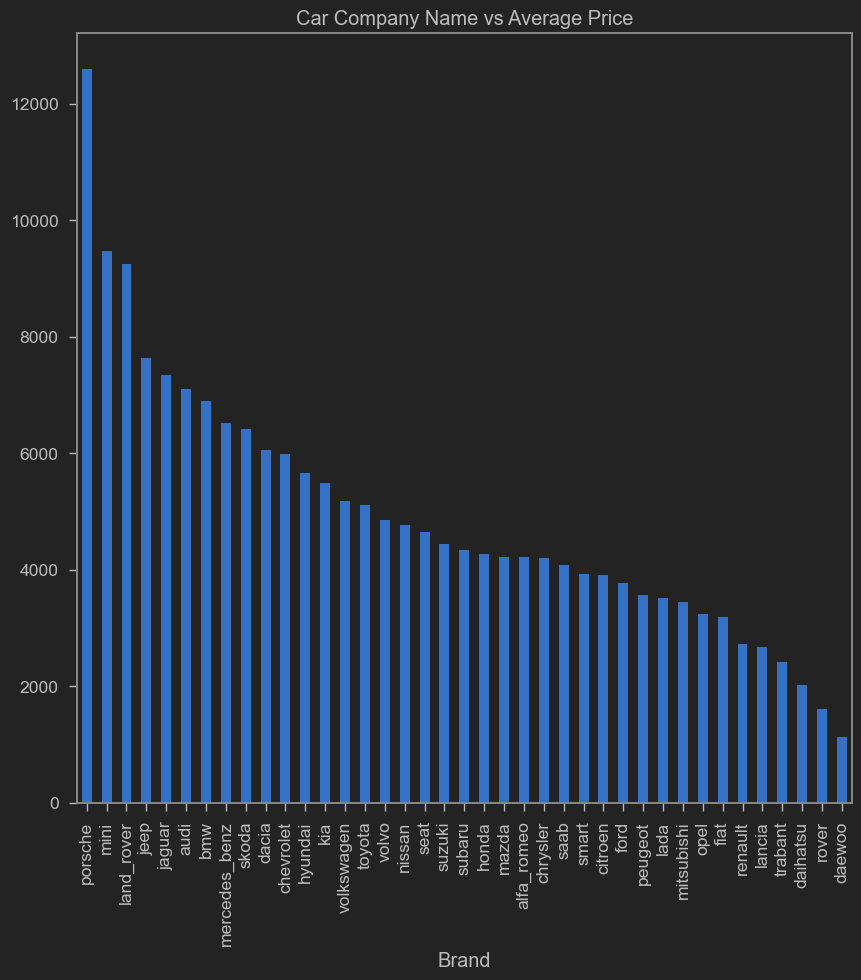

In [15]:
ax=data.groupby(['Brand'])['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
ax.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

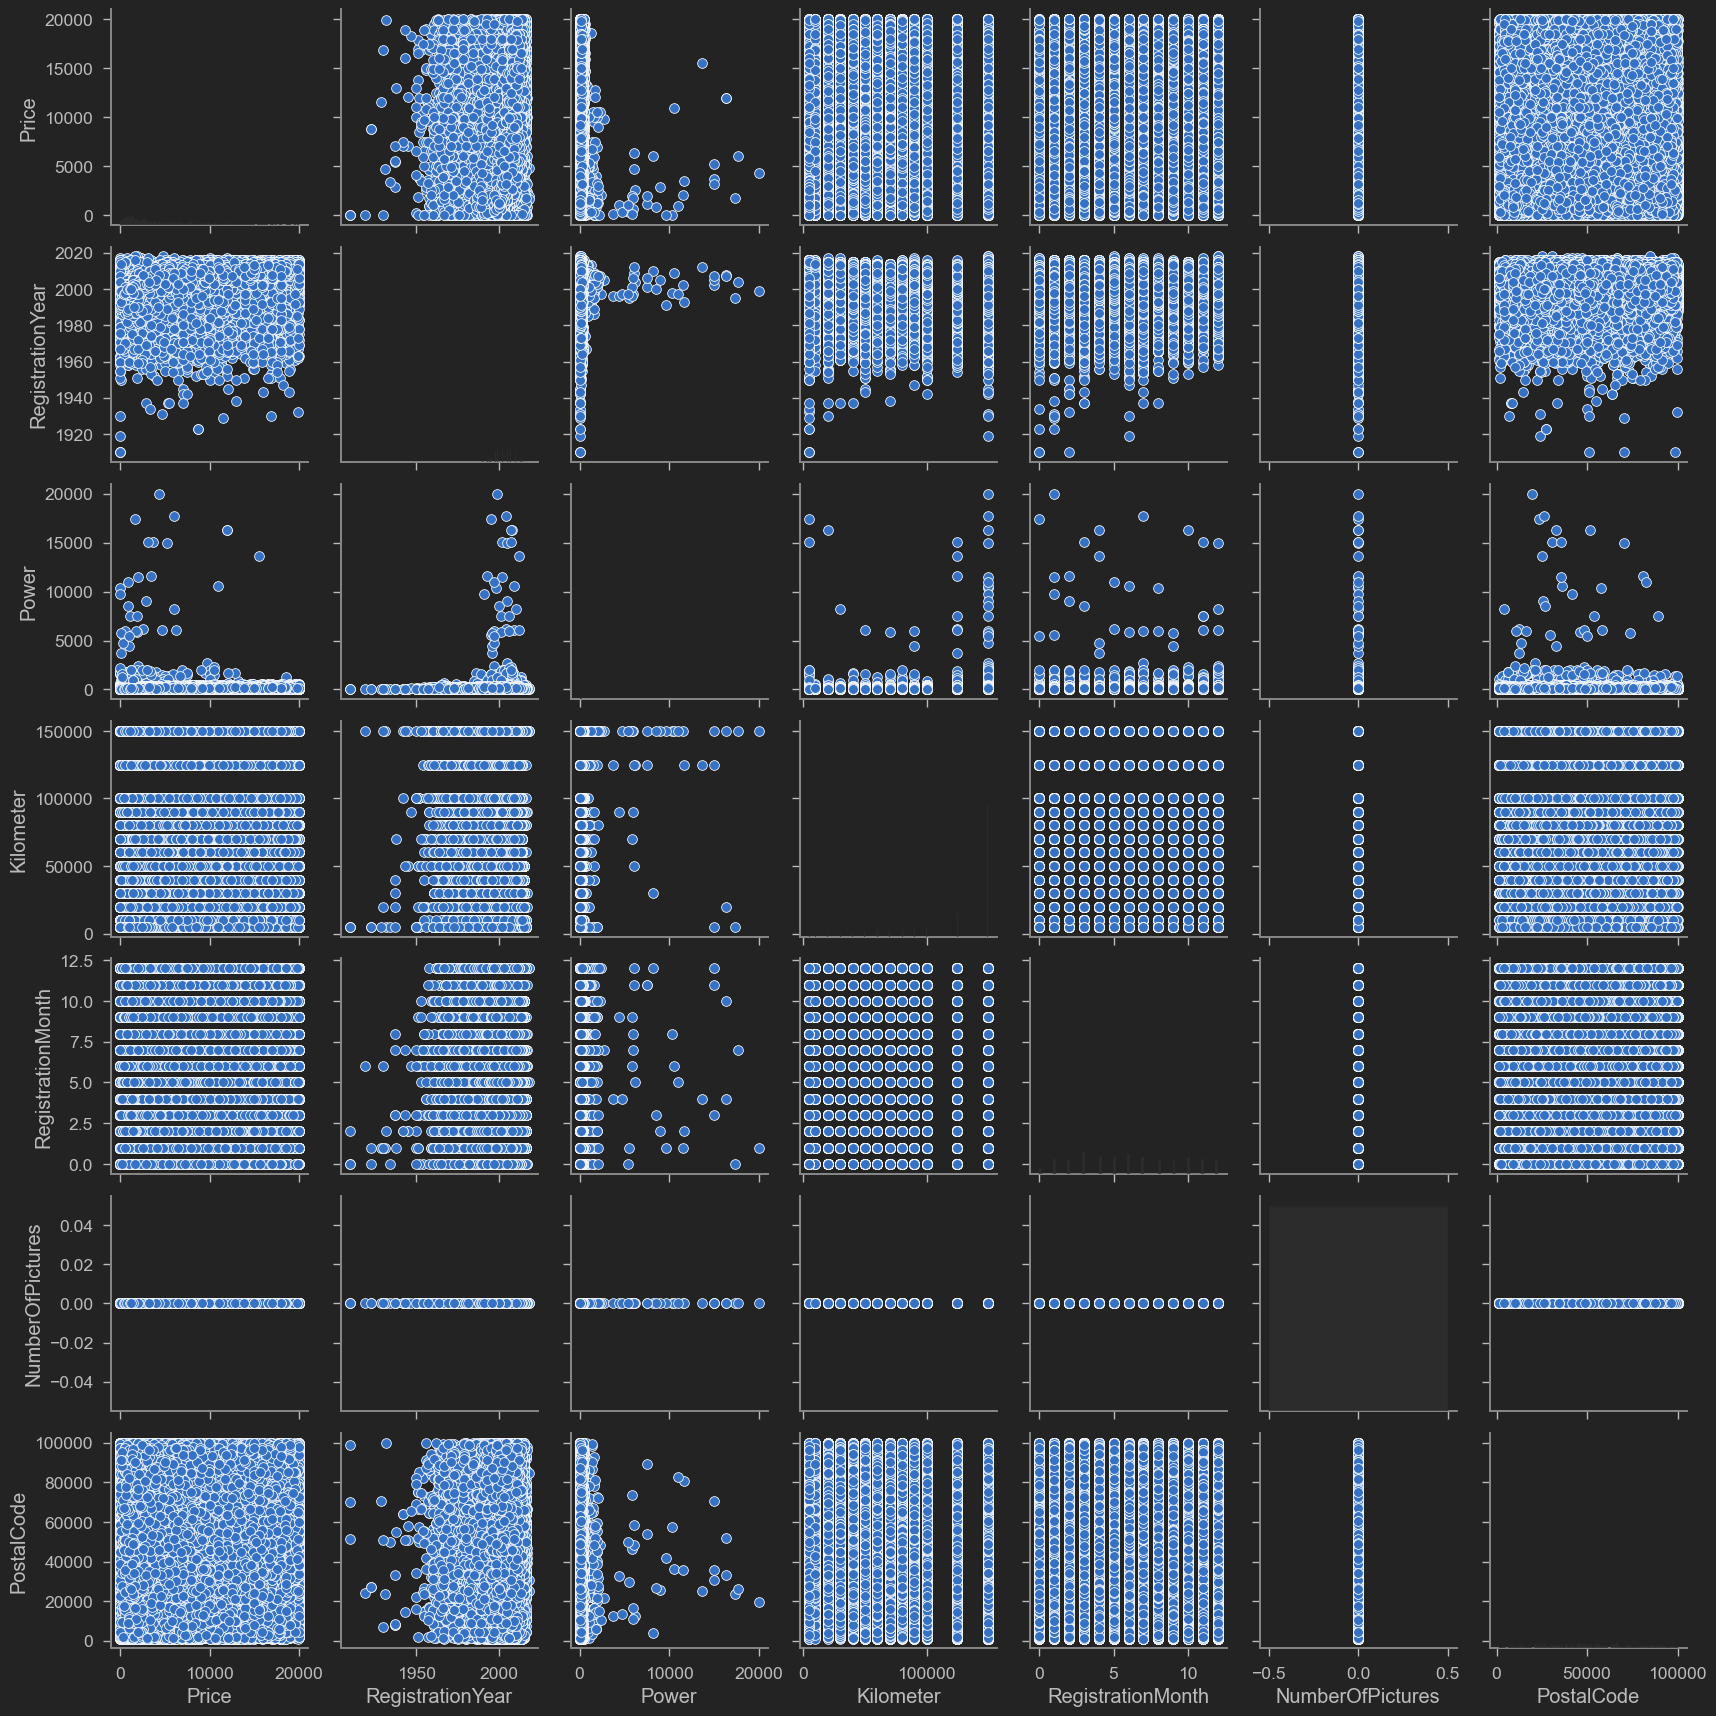

In [16]:
sns.pairplot(data) 

### Extracting Object value for data pre-processing for our model.

In [17]:
{column : len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'VehicleType': 8,
 'Gearbox': 2,
 'Model': 249,
 'FuelType': 7,
 'Brand': 39,
 'Repaired': 2}

In [18]:
sig_cat_col=['Gearbox','VehicleType','Model','FuelType','FuelType', 'Repaired']

In [19]:
dummies=pd.get_dummies(data[sig_cat_col])
print(dummies.shape)
dummies.head()

(245814, 275)


,Gearbox_auto,Gearbox_manual,VehicleType_bus,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_wagon,...,FuelType_petrol,FuelType_cng,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,Repaired_no,Repaired_yes
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
6,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
7,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [20]:
df_num_val = data[['Price','RegistrationYear','Power','Kilometer','PostalCode']]

In [21]:
data=pd.concat([df_num_val,dummies],axis=1)

In [22]:
data.head()

,Price,RegistrationYear,Power,Kilometer,PostalCode,Gearbox_auto,Gearbox_manual,VehicleType_bus,VehicleType_convertible,VehicleType_coupe,...,FuelType_petrol,FuelType_cng,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,Repaired_no,Repaired_yes
3,1500,2001,75,150000,91074,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,3600,2008,69,90000,60437,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,650,1995,102,150000,33775,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
6,2200,2004,109,150000,67112,0,1,0,1,0,...,1,0,0,0,0,0,0,1,1,0
7,0,1980,50,40000,19348,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [23]:
data.columns

Index(['Price', 'RegistrationYear', 'Power', 'Kilometer', 'PostalCode',
       'Gearbox_auto', 'Gearbox_manual', 'VehicleType_bus',
       'VehicleType_convertible', 'VehicleType_coupe',
       ...
       'FuelType_petrol', 'FuelType_cng', 'FuelType_electric',
       'FuelType_gasoline', 'FuelType_hybrid', 'FuelType_lpg',
       'FuelType_other', 'FuelType_petrol', 'Repaired_no', 'Repaired_yes'],
      dtype='object', length=280)

In [24]:
def train_test_split_func(X, y):
    # Train-test split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=37)
    
    X_train, X_other, y_train, y_other = train_test_split(X, y, 
                                                      test_size=0.30, 
                                                      random_state=5)


    X_valid, X_test, y_valid, y_test = train_test_split(X_other, 
                                                        y_other,
                                                  test_size=0.66, 
                                                  random_state=5)

    return X_train, X_test, X_valid, y_train, y_test, y_valid

In [25]:
X = data.drop("Price", axis=1)
y = data["Price"]

In [26]:
X = np.array(X)
y= np.array(y)

In [27]:
X_train, X_test, X_valid, y_train, y_test, y_valid = train_test_split_func(X, y)

In [28]:
X

array([[  2001,     75, 150000, ...,      1,      1,      0],
       [  2008,     69,  90000, ...,      0,      1,      0],
       [  1995,    102, 150000, ...,      1,      0,      1],
       ...,
       [  2000,      0, 150000, ...,      1,      1,      0],
       [  2000,    101, 125000, ...,      1,      1,      0],
       [  1996,    102, 150000, ...,      0,      1,      0]], dtype=int64)

In [29]:
y

array([1500, 3600,  650, ..., 1150, 1199, 9200], dtype=int64)

In [30]:
print('Train features sample size:', X_train.shape[0])
print('Train target sample size:', y_train.shape[0])
print()
print('Validation features sample size:', X_valid.shape[0])
print('Validation target sample size:', y_valid.shape[0])
print()
print('Test features sample size:', X_test.shape[0])
print('Test target sample size:', y_test.shape[0])
print()
print('Train features sample size, %:', round(len(X_train) / len(X) * 100), '%')
print('Valid features sample size, %:', round(len(X_valid) / len(X) * 100), '%')
print('Test features sample size, %:', round(len(X_test) / len(X) * 100), '%')
print()
print('Train target sample size, %:', round(len(y_train) / len(y) * 100), '%')
print('Valid target sample size, %:', round(len(y_valid) / len(y) * 100), '%')
print('Test target sample size, %:', round(len(y_test) / len(y) * 100), '%')

Train features sample size: 172069
Train target sample size: 172069

Validation features sample size: 25073
Validation target sample size: 25073

Test features sample size: 48672
Test target sample size: 48672

Train features sample size, %: 70 %
Valid features sample size, %: 10 %
Test features sample size, %: 20 %

Train target sample size, %: 70 %
Valid target sample size, %: 10 %
Test target sample size, %: 20 %


### ***Conclusion***: We have normalized, augmented and split the initial dataset into train (70%), validation (10%) and test (20%) samples, and thus ready to train the ML model.

The subsamples are the following:
- X_train 70%
- y_train 70%

- X_valid 10%
- y_valid 10%

- X_test 20%
- y_test 20%

##  Tackling the disbalance

In [31]:
y_train_df = pd.DataFrame(y_train)

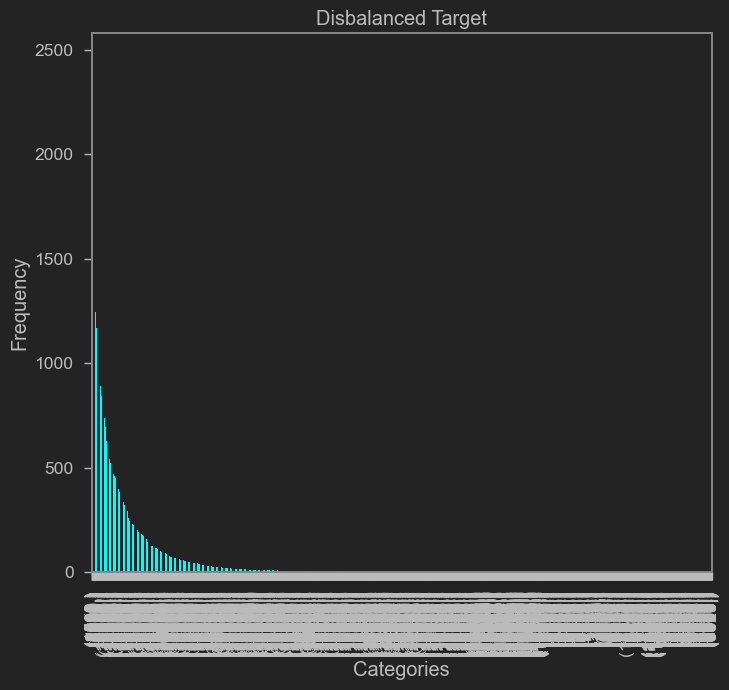

In [32]:
y_train_df.value_counts().plot(kind='bar', color=['cyan'])

plt.title('Disbalanced Target')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show();

In [33]:
y_test_df = pd.DataFrame(y_test)

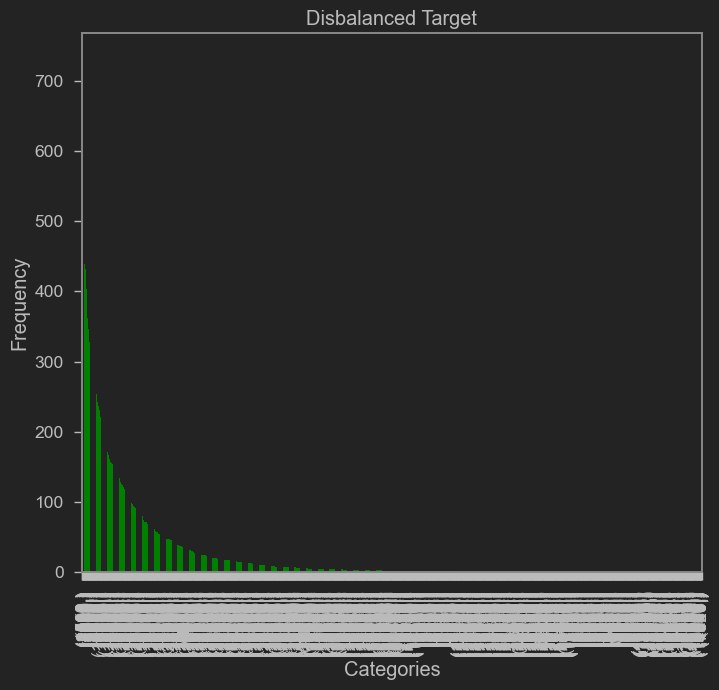

In [34]:
y_test_df.value_counts().plot(kind='bar', color=['green'])

plt.title('Disbalanced Target')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show();

### ***Conclusion***: As long as the test data is quite well balanced, we keep it as is.

# Model evaluate
It is one kind of function defined :
   - Making **prediction**
   - calcuate **test accuracy**
   - created **confusion matrix**
   - generate **heatmap**
   - show **classification report** 

# Model Building

# Gradient Boosting Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
class CustomGradientBoostingRegressor:
    
    def __init__(self, learning_rate, n_estimators, max_depth=1):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
        
    def fit(self, X, y):
        
        self.F0 = y.mean()
        Fm = self.F0
        
        for _ in range(self.n_estimators):
            r = y - Fm
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=0)
            tree.fit(X, r)
            gamma = tree.predict(X)
            Fm += self.learning_rate * gamma
            self.trees.append(tree)
            
    def predict(self, X):
        
        Fm = self.F0
        
        for i in range(self.n_estimators):
            Fm += self.learning_rate * self.trees[i].predict(X)
            
        return Fm

In [43]:
X_train.shape

(172069, 279)

In [44]:
y_train.shape

(172069,)

In [45]:
X_test.shape

(48672, 279)

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

custom_gbm = CustomGradientBoostingRegressor(
    n_estimators=20, 
    learning_rate=0.1, 
    max_depth=1
)
custom_gbm.fit(X_train, y_train)

sklearn_gbm = GradientBoostingRegressor(
    n_estimators=20, 
    learning_rate=0.1, 
    max_depth=1
)
sklearn_gbm.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=20)

In [70]:
custom_gbm.fit(X_test, y_test)

In [71]:
sklearn_gbm.fit(X_test, y_test)

GradientBoostingRegressor(max_depth=1, n_estimators=20)

In [72]:
predicitons_custom = custom_gbm.predict(X_test).round()

In [73]:
predicitons_sklearn = sklearn_gbm.predict(X_test).round()

In [74]:
accuracy_score(y_test, predicitons_custom)

2.05456936226167e-05

In [75]:
accuracy_score(y_test, predicitons_sklearn)

4.10913872452334e-05